In [1]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import keras.utils as image
#from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

(416, 416, 3)

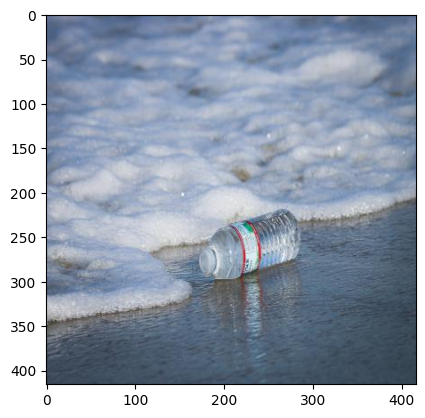

In [3]:
img = image.load_img("C:/Users/sletz/Desktop/sem 6/tarp proj/Underwater-Plastic-Detection-main/Plastic_Dataset/train/Underwater_Plastic/1_jpg.rf.871d937782eb997e42750b67dd22aa8d.jpg")
plt.imshow(img)
cv2.imread("C:/Users/sletz/Desktop/sem 6/tarp proj/Underwater-Plastic-Detection-main/Plastic_Dataset/train/Underwater_Plastic/1_jpg.rf.871d937782eb997e42750b67dd22aa8d.jpg").shape

In [4]:
training = "C:/Users/sletz/Desktop/sem 6/tarp proj/Underwater-Plastic-Detection-main/Plastic_Dataset/train"
training_datagen = ImageDataGenerator(rescale = 1/255, horizontal_flip = True,rotation_range=30,fill_mode='nearest')
validation = "C:/Users/sletz/Desktop/sem 6/tarp proj/Underwater-Plastic-Detection-main/Plastic_Dataset/valid"
validation_datagen = ImageDataGenerator(rescale = 1/255)


In [5]:
import os
os.listdir(training)

['Not_Plastic', 'Underwater_Plastic']

In [6]:
train_generator = training_datagen.flow_from_directory(training,target_size=(416,416),class_mode='categorical',batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(validation, target_size=(416,416), class_mode='categorical', batch_size= 16)

Found 2182 images belonging to 2 classes.
Found 655 images belonging to 2 classes.


In [7]:
model_plastic = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(416,416, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model_plastic.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=0.0001),
metrics=['acc','msle','mse','mae',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [8]:
history = model_plastic.fit(train_generator,steps_per_epoch = 15,epochs = 50,
                            validation_data = validation_generator,validation_steps = 15)

Epoch 1/50
15/15 [==============================] - 245s 15s/step - loss: 0.4509 - acc: 0.8396 - msle: 0.0657 - mse: 0.1334 - mae: 0.2660 - precision: 0.8396 - recall: 0.8396 - val_loss: 0.4596 - val_acc: 0.8667 - val_msle: 0.0722 - val_mse: 0.1427 - val_mae: 0.3551 - val_precision: 0.8667 - val_recall: 0.8667
Epoch 2/50
15/15 [==============================] - 234s 15s/step - loss: 0.3078 - acc: 0.8854 - msle: 0.0458 - mse: 0.0925 - mae: 0.2031 - precision: 0.8854 - recall: 0.8854 - val_loss: 0.1291 - val_acc: 0.9500 - val_msle: 0.0185 - val_mse: 0.0377 - val_mae: 0.0818 - val_precision: 0.9500 - val_recall: 0.9500
Epoch 3/50
15/15 [==============================] - 253s 17s/step - loss: 0.2788 - acc: 0.8990 - msle: 0.0371 - mse: 0.0759 - mae: 0.1433 - precision: 0.8990 - recall: 0.8990 - val_loss: 0.3466 - val_acc: 0.8333 - val_msle: 0.0516 - val_mse: 0.1017 - val_mae: 0.2713 - val_precision: 0.8333 - val_recall: 0.8333
Epoch 4/50
15/15 [==============================] - 232s 15s/ste

In [9]:
model_plastic.save("C:/Users/sletz/Desktop/sem 6/tarp proj/Underwater-Plastic-Detection-main/Plastic_Dataset/plastic_detection.h5")

In [10]:
from keras.models import load_model
model_plastic = load_model("C:/Users/sletz/Desktop/sem 6/tarp proj/Underwater-Plastic-Detection-main/Plastic_Dataset/plastic_detection.h5")

Average Accuracy : 0.9359189784526825
MAE:  0.10240914456546307
MSE:  0.04927234075963497
MSLE:  0.024212966207414865
Precision: 0.9359189784526825
Recall: 0.9359189784526825
F1_score:  0.9359189784526825


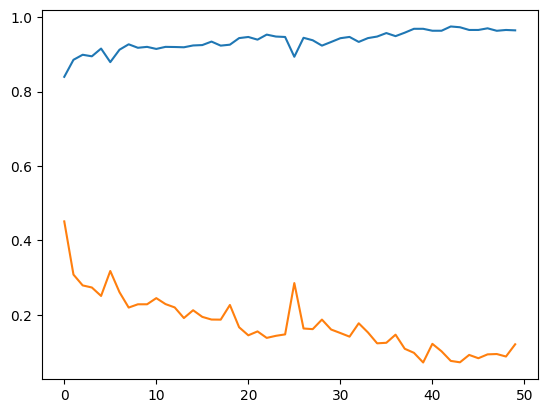

In [12]:
accs = history.history['acc']
print("Average Accuracy :",sum(accs)/len(accs))
plt.plot(accs)

loss = history.history['loss']
plt.plot(loss)

maemet=history.history['mae']
print("MAE: ",sum(maemet)/len(maemet))

msemet=history.history['mse']
print("MSE: ",sum(msemet)/len(maemet))

mslemet=history.history['msle']
print("MSLE: ",sum(mslemet)/len(mslemet))

prec=history.history['precision']
pre=sum(prec)/len(prec)
print("Precision:",sum(prec)/len(prec))

rec=history.history['recall']
recc=sum(rec)/len(rec)
print("Recall:",sum(rec)/len(rec))

f1_score=2*((pre*recc)/(pre+recc))
print("F1_score: ",f1_score)

In [13]:
def detect(str,flag):
    if(flag == True):
        return "Detected " + str
    
    else:
        return "Didn't detect " + str

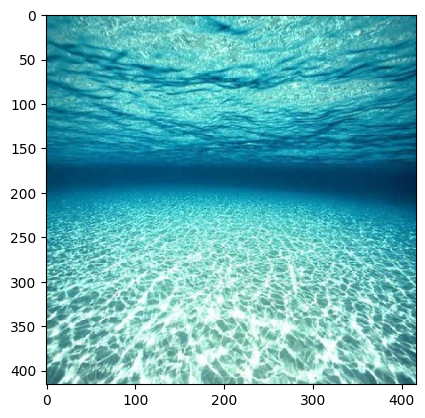

1/1 [==============================] - 0s 263ms/step
Didn't detect Underwater_Plastic


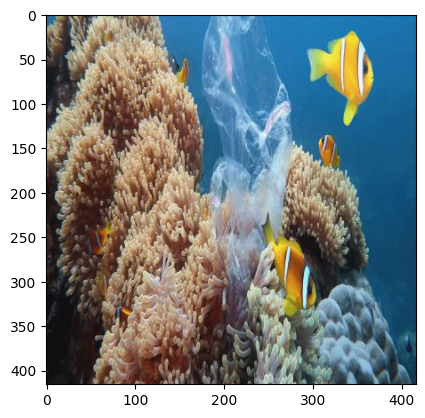

1/1 [==============================] - 0s 182ms/step
Didn't detect Underwater_Plastic


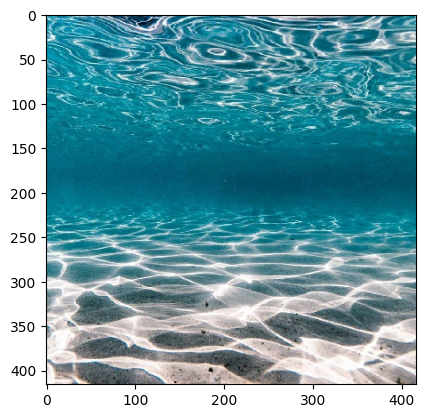

1/1 [==============================] - 0s 201ms/step
Didn't detect Underwater_Plastic


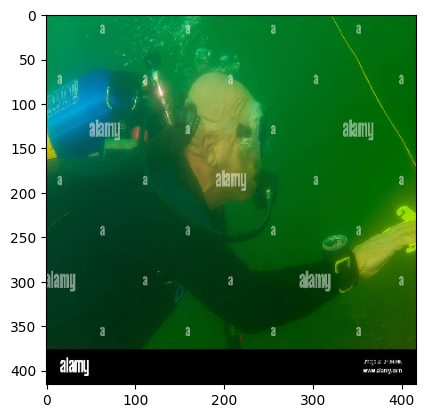

1/1 [==============================] - 0s 175ms/step
Didn't detect Underwater_Plastic


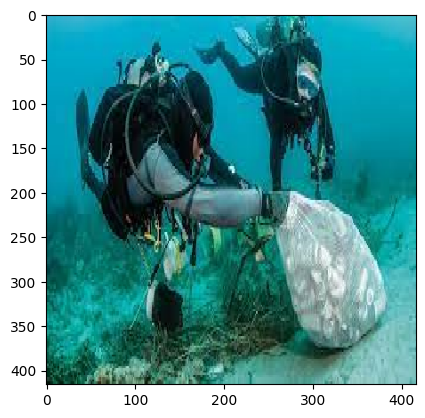

1/1 [==============================] - 0s 184ms/step
Detected Underwater_Plastic


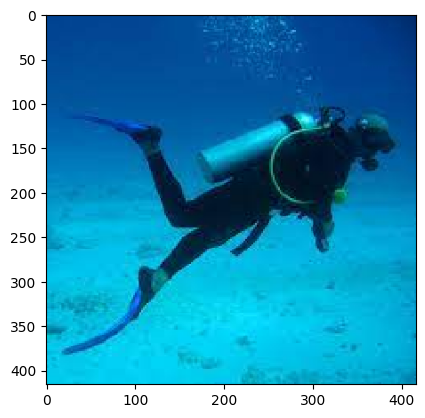

1/1 [==============================] - 0s 177ms/step
Didn't detect Underwater_Plastic


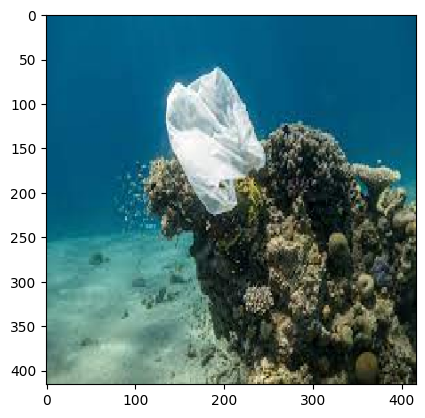

1/1 [==============================] - 0s 174ms/step
Detected Underwater_Plastic


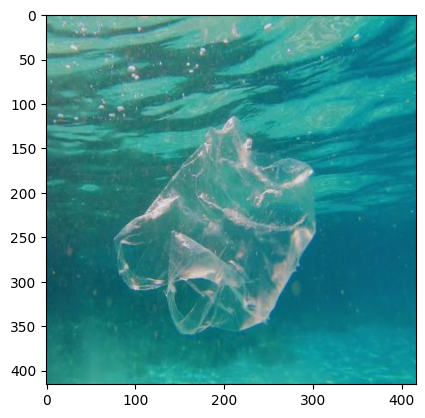

1/1 [==============================] - 0s 170ms/step
Detected Underwater_Plastic


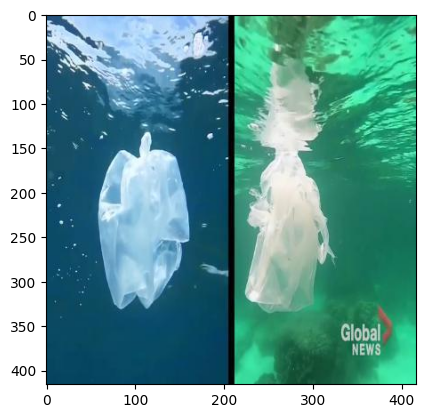

1/1 [==============================] - 0s 172ms/step
Detected Underwater_Plastic


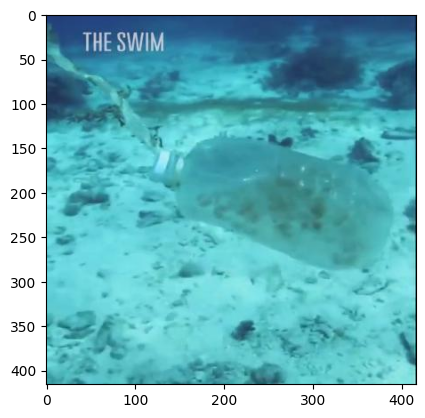

1/1 [==============================] - 0s 168ms/step
Detected Underwater_Plastic


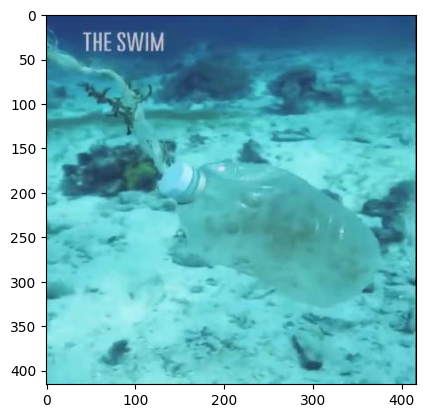

1/1 [==============================] - 0s 172ms/step
Detected Underwater_Plastic


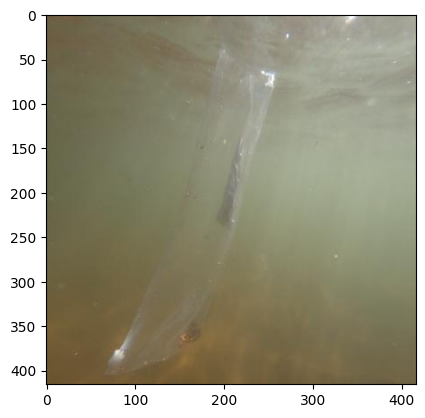

1/1 [==============================] - 0s 223ms/step
Detected Underwater_Plastic


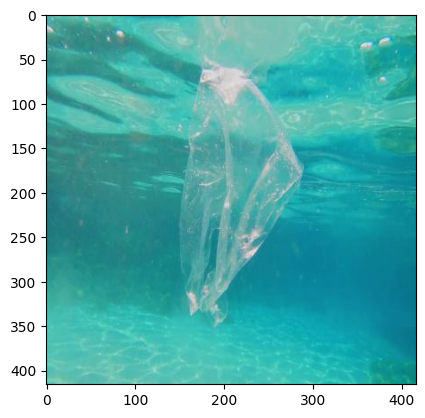

1/1 [==============================] - 0s 222ms/step
Detected Underwater_Plastic


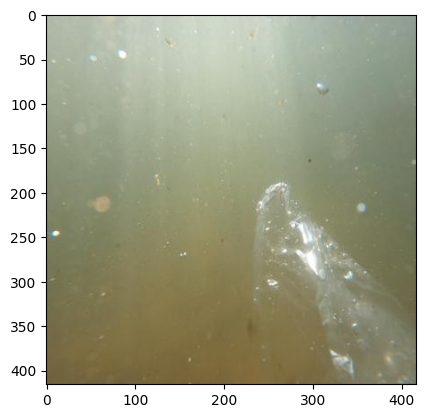

1/1 [==============================] - 0s 207ms/step
Detected Underwater_Plastic


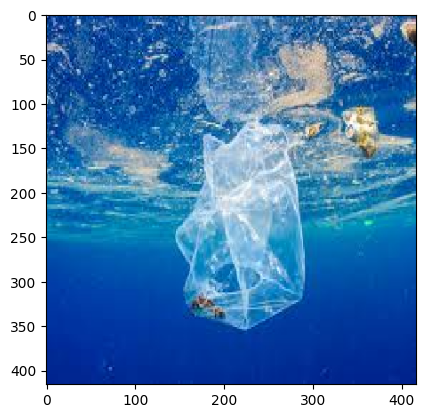

1/1 [==============================] - 0s 187ms/step
Didn't detect Underwater_Plastic


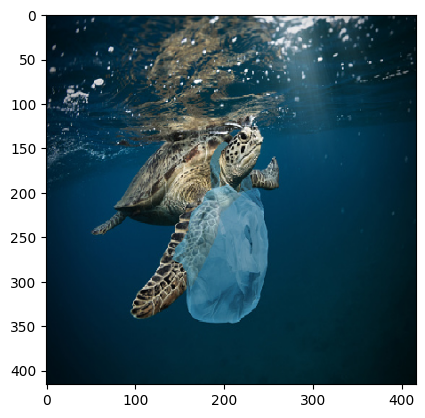

1/1 [==============================] - 0s 181ms/step
Detected Underwater_Plastic


In [16]:
import numpy as np
import os
from matplotlib import pyplot as plt
path = 'C:/Users/sletz/Desktop/sem 6/tarp proj/Underwater-Plastic-Detection-main/Plastic_Dataset/test'
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size = (416,416))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255
    classes = model_plastic.predict(x)
    plastic_flag = detect("Underwater_Plastic",np.argmax(classes[0]) == 1 )
    print(plastic_flag)